In [4]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

### Definición de la red

In [5]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 3, activation=activation_functions.softmax,
                            activation_derivate=None))

### Dataset de Iris

In [6]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

In [8]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
acc = optimizers.momentum_gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=100, learning_rate=0.01)

accuracy before training:  0.23333333333333334
epoch   0 - accuracy 0.66667
epoch  10 - accuracy 0.95833
epoch  20 - accuracy 0.95833
epoch  30 - accuracy 0.95833
epoch  40 - accuracy 0.95833
epoch  50 - accuracy 0.95833
epoch  60 - accuracy 0.95833
epoch  70 - accuracy 0.95833
epoch  80 - accuracy 0.95833
epoch  90 - accuracy 0.95833


In [10]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  1.0


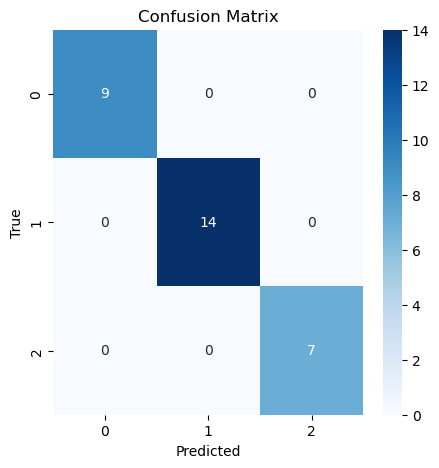

In [11]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

In [12]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=None))

### Dataset de MNIST

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Entrenamiento de la red

In [15]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
acc = optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=200, learning_rate=0.001)

accuracy before training:  0.0595
epoch   0 - accuracy 0.81625
epoch  10 - accuracy 0.90250
epoch  20 - accuracy 0.91425
epoch  30 - accuracy 0.91733
epoch  40 - accuracy 0.92008
epoch  50 - accuracy 0.92258
epoch  60 - accuracy 0.92308
epoch  70 - accuracy 0.92133
epoch  80 - accuracy 0.92142
epoch  90 - accuracy 0.92100
epoch 100 - accuracy 0.92125
epoch 110 - accuracy 0.92125
epoch 120 - accuracy 0.92125
epoch 130 - accuracy 0.91975
epoch 140 - accuracy 0.92033
epoch 150 - accuracy 0.91933
epoch 160 - accuracy 0.91825
epoch 170 - accuracy 0.91708
epoch 180 - accuracy 0.91592
epoch 190 - accuracy 0.91533


In [16]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9128


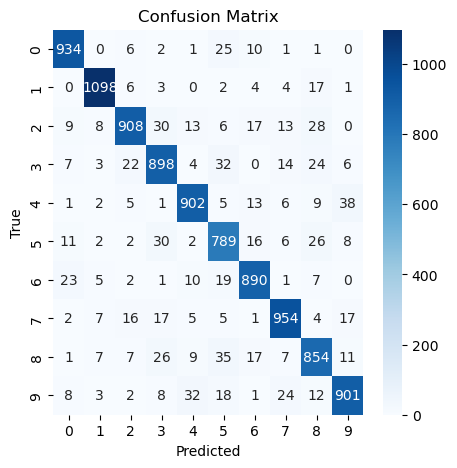

In [17]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()